# Tasks

1) <a href='#DECISION_TREE'>  Plot basic Decision Tree. Show the ROC Curve for different depths</a> <BR>
2) <a href='#CROSS_VALIDATION'>Use out of sample cross validation and show the ROC curve for each</a><br>
3) <a href='#RANDOM_FOREST'>Fit a Random Forest</a><br>
4) <a href='#TWO_PARAMS'>Grid Search on Random Forest (varying depth and number of trees)</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import graphviz

In [2]:
#df = pd.read_csv ('chapter_1_cleaned_data.csv')
import requests
url = 'https://raw.githubusercontent.com/steed360/PythonMachineLearning/main/chapter_1_cleaned_data.csv'
#s = requests.get(url).content
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = pd.read_csv ( url)


Get a list of the column names

In [3]:
features_response = df.columns.tolist ()
features_response

['Unnamed: 0',
 'ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [4]:
lst_items_to_remove = [features_response[0]] +['ID', 'SEX','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION_2', 'grad school', 'high school', 'other', 'uni']
lst_items_to_remove

['Unnamed: 0',
 'ID',
 'SEX',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [5]:
features_response = [item for item in features_response if item not in lst_items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = train_test_split ( df[features_response[:-1]]  , df['default payment next month'] , test_size = 0.2, random_state = 24)

In [8]:
print (X_train.shape, y_train.shape)

(21331, 17) (21331,)


In [9]:
dt = tree.DecisionTreeClassifier ( max_depth = 2)

In [10]:
dt.fit ( X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
dot_data = tree.export_graphviz ( dt, proportion=True, 
                                 feature_names = features_response[:-1], 
                                 class_names=['Not Default','Default'],
                                rounded=True)

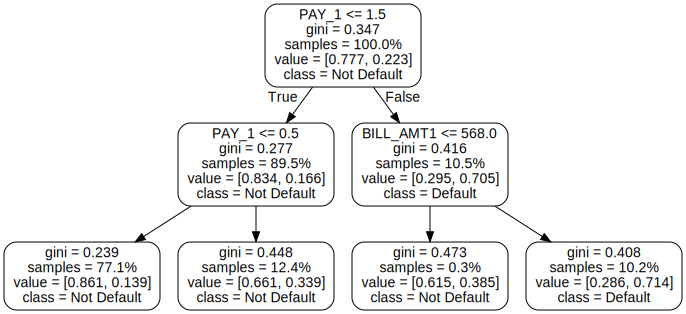

In [12]:
graph = graphviz.Source (dot_data)
graph

Text(0, 0.5, 'TPR')

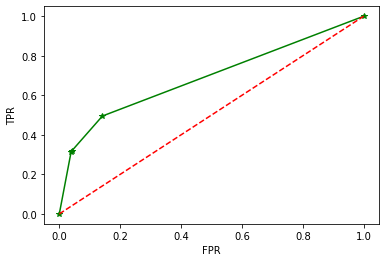

In [13]:

from sklearn.metrics import roc_curve

predict_proba =  dt.predict_proba (X_test ) 
fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])

plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')

#plt.hist ( predict_proba[:,1])


plt.xlabel ('FPR')
plt.ylabel ('TPR')


#### Plot the ROC curve with different tree depths 

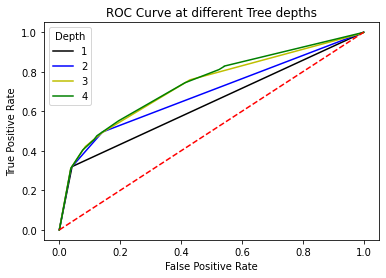

In [14]:
cmap = { 1:'k',2:'b',3:'y',4:'g',5:'pink' }

#axes = plt.axes()

for this_depth in [i+1 for i in range (4)]:
    dt = tree.DecisionTreeClassifier ( max_depth = this_depth)
    dt.fit ( X_train, y_train)
    predict_proba =  dt.predict_proba (X_test ) 
    fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])
    #aStr = 'depth {0}'.format ( cmap[this_depth] )  
    plt.plot (fpr, tpr,  cmap[this_depth], label = this_depth )
    #axes.legend ( cmap.keys() )

plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ( 'ROC Curve at different Tree depths')    
plt.legend(title="Depth")


<a id='CROSS_VALIDATION'>Build ROC Curves for several cross validation folds</a>


This is just an idea that I had - it is not best practice

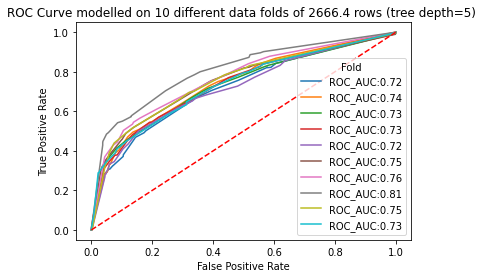

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics         import roc_auc_score

#C_vals = [0.00005, 0.0005,0.005,0.05,0.5,1,1.5,2]
#C_vals = [0.05,0.5,1,1.5,2]

k_folds = KFold ( n_splits = 10, shuffle=False, random_state = None)

X_train, X_test, y_train, y_test = train_test_split ( df[features_response[:-1]]  , df['default payment next month'] , test_size = 0.2, random_state = 24)

X =  df[features_response[:-1]].values 
y =  df['default payment next month'].values

this_fold = 0

#for train_index, test_index in k_folds.split (X, y): 
for train_index, test_index in k_folds.split (X_train,y_train): 
    
    this_fold = this_fold + 1
    
    X_cv_train = X[train_index]
    y_cv_train = y[train_index]
     
    dt = tree.DecisionTreeClassifier ( max_depth = 5)
    dt.fit ( X_cv_train, y_cv_train)        

    X_cv_test  = X[test_index]
    y_cv_test  = y[test_index]

    predict_proba =  dt.predict_proba (X_cv_test ) 
    fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
    
    roc_score = roc_auc_score (y_cv_test, predict_proba[:,1])    

    #predict_proba =  dt.predict_proba (X_test ) 
    #fpr, tpr, thresholds =  roc_curve (y_test, predict_proba[:,1])

    lab = 'ROC_AUC:{1}'.format ( this_fold, round (roc_score, 2))
    plt.plot (fpr, tpr,  label = lab )
    
plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ( 'ROC Curve modelled on {0} different data folds of {1} rows (tree depth=5) '.format ( k_folds.n_splits,  int(X.shape [0]) / k_folds.n_splits))    
plt.legend(title="Fold")


##### Apply a Grid Search

The idea is to find the optimal hyperparameters for a Decision Tree given the dataset we have

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = { 'max_depth':[1,2,4,6,8,10,12,14,16,18]}

In [18]:
cv = GridSearchCV ( dt, param_grid=params, scoring='roc_auc',refit=True,cv=4,verbose=1,return_train_score=True)
cv

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]},
     

In [19]:
cv.fit ( X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]},
     

In [20]:
cv_results_df = pd.DataFrame ( cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.029880,0.003416,0.004273,0.000817,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.051616,0.002004,0.004686,0.001188,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.095382,0.003048,0.004350,0.000119,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.132619,0.002880,0.004269,0.000026,6,{'max_depth': 6},0.745252,0.746825,0.751932,0.741614,0.746406,0.003708,1,0.782202,0.780044,0.775228,0.774750,0.778056,0.003165
4,0.170309,0.002333,0.004549,0.000357,8,{'max_depth': 8},0.728253,0.731400,0.751450,0.731612,0.735679,0.009202,3,0.812138,0.808245,0.803345,0.802003,0.806432,0.004031
5,0.211774,0.002632,0.004632,0.000136,10,{'max_depth': 10},0.713443,0.705058,0.716562,0.711670,0.711683,0.004207,4,0.848838,0.853976,0.841285,0.836575,0.845169,0.006707
6,0.239570,0.003479,0.004861,0.000460,12,{'max_depth': 12},0.670609,0.654729,0.671976,0.682263,0.669894,0.009846,6,0.888092,0.903190,0.885771,0.875850,0.888226,0.009787
7,0.273020,0.005773,0.005117,0.000726,14,{'max_depth': 14},0.641627,0.627735,0.649655,0.656015,0.643758,0.010563,8,0.929927,0.943440,0.926380,0.915082,0.928707,0.010120
8,0.294023,0.003531,0.004826,0.000064,16,{'max_depth': 16},0.616589,0.598866,0.631888,0.632526,0.619967,0.013752,9,0.960131,0.970413,0.958299,0.947391,0.959058,0.008167
9,0.310023,0.005764,0.006710,0.002470,18,{'max_depth': 18},0.597388,0.589801,0.609944,0.626145,0.605820,0.013764,10,0.981613,0.985759,0.978869,0.966786,0.978257,0.007063


In [21]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Create an error bar plot of testing and training scores for each value of max_depth

Text(0, 0.5, 'ROC UC')

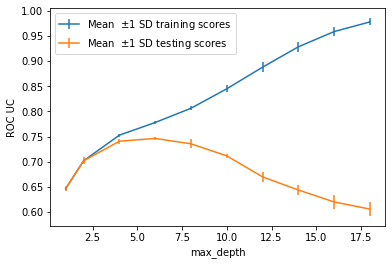

In [22]:
ax = plt.axes ()
ax.errorbar ( cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score'] ,
             label="Mean  $\pm$1 SD training scores")
             

ax.errorbar ( cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score'],
             label="Mean  $\pm$1 SD testing scores")

ax.legend()
plt.xlabel ('max_depth')
plt.ylabel ('ROC UC')

#### Apply a random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
rf = RandomForestClassifier ( 
    n_estimators = 10, 
    criterion = 'gini', 
    max_depth = 3, 
    min_samples_split = 2,
    min_samples_leaf = 1 , min_weight_fraction_leaf = 0.0,
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    bootstrap = True, 
    oob_score= False, 
    n_jobs= None,
    random_state = 4, 
    verbose = 0, 
    warm_start = False, 
    class_weight = None
)

Create a parameter grid.

In [27]:
# Number of trees
rf_params_ex = { 'n_estimators': list ( range ( 10, 110, 10)) }

#rf_params_ex = { 'n_estimators': [60, 70] ,'max_depth' : [1,2] }

rf_params_ex

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [28]:
from sklearn.model_selection import GridSearchCV
cv_rf_ex = GridSearchCV ( rf, param_grid = rf_params_ex, scoring= 'roc_auc')
cv_rf_ex.cv = 5
cv_rf_ex.fit ( X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [29]:
cv_rf_ex_results_df = pd.DataFrame ( cv_rf_ex.cv_results_)

In [30]:
cv_rf_ex_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154871,0.003667,0.007668,0.000504,10,{'n_estimators': 10},0.746594,0.745945,0.751689,0.771846,0.766402,0.756495,0.010642,10
1,0.299660,0.004873,0.010905,0.000338,20,{'n_estimators': 20},0.750097,0.753844,0.757607,0.778537,0.765789,0.761175,0.010118,9
2,0.432600,0.009178,0.013887,0.000364,30,{'n_estimators': 30},0.750020,0.756322,0.757938,0.778856,0.767580,0.762143,0.010074,7
3,0.567033,0.004884,0.017296,0.000684,40,{'n_estimators': 40},0.751988,0.753061,0.756997,0.780233,0.767922,0.762040,0.010702,8
4,0.711624,0.007673,0.020365,0.000500,50,{'n_estimators': 50},0.753248,0.755398,0.758032,0.782004,0.767485,0.763233,0.010569,1
5,0.853551,0.004481,0.024558,0.002457,60,{'n_estimators': 60},0.753124,0.755150,0.757815,0.781853,0.767627,0.763114,0.010610,2
6,0.995664,0.009287,0.026969,0.000979,70,{'n_estimators': 70},0.751764,0.754817,0.757305,0.781786,0.767301,0.762595,0.010920,5
7,1.130275,0.003225,0.029754,0.000332,80,{'n_estimators': 80},0.751515,0.754944,0.757293,0.782051,0.767650,0.762691,0.011076,3
8,1.271500,0.004283,0.034423,0.001631,90,{'n_estimators': 90},0.750878,0.754986,0.757039,0.781704,0.766812,0.762284,0.011032,6
9,1.418267,0.016506,0.036457,0.000904,100,{'n_estimators': 100},0.751308,0.755503,0.757298,0.782047,0.767213,0.762674,0.011004,4


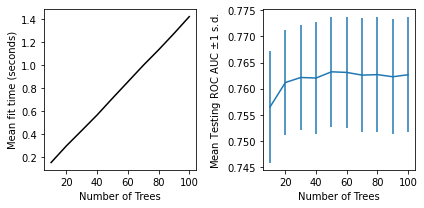

In [31]:
fig, axs = plt.subplots ( nrows=1, ncols=2, figsize= (6,3) ) 

axs[0].plot (
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-0'
)

axs[0].set_xlabel  ( 'Number of Trees')
axs[0].set_ylabel  ( 'Mean fit time (seconds)')

axs[1].errorbar (
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score']
)

axs[1].set_xlabel  ( 'Number of Trees')
axs[1].set_ylabel  ( 'Mean Testing ROC AUC $\pm$1 s.d.')


plt.tight_layout()

In [32]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [33]:
df_feature_importance = pd.DataFrame (  { 'Feature name': features_response[:-1],
                                         'Importance'   : cv_rf_ex.best_estimator_.feature_importances_
                                        })

df_feature_importance.sort_values ('Importance', ascending= False)[0:10]

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


The best hyperparameter is 50 trees, what ROC AUC can be obtained on the holdout data?

In [34]:
rf.n_estimators = 50

In [35]:
rf.fit ( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [36]:
predict_proba =  rf.predict_proba ( X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
roc_score = roc_auc_score (y_test, predict_proba[:,1])    
print (roc_score)


0.7627206206909415


### <a id= TWO_PARAMS>Try and fit a better random forest model by varying two parameters</a>

In [52]:
# Number of trees
rf_params_ex = { 'n_estimators': [10,50,150,200],
                 'max_depth'   : [3,6,9,12] 
               }
rf_params_ex

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 150, 200]}

In [53]:
cv_rf_ex = GridSearchCV ( rf, param_grid = rf_params_ex, 
                         scoring= 'roc_auc'
                        )
cv_rf_ex.cv = 5
cv_rf_ex.verbose = True
cv_rf_ex.fit ( X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [58]:
cv_rf_ex_results_df_2 = pd.DataFrame ( cv_rf_ex.cv_results_)

In [40]:
cv_rf_ex_results_df_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156687,0.006157,0.008112,0.000857,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.746594,0.745945,0.751689,0.771846,0.766402,0.756495,0.010642,12
1,0.722831,0.008645,0.020088,0.000340,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.753248,0.755398,0.758032,0.782004,0.767485,0.763233,0.010569,9
2,2.844932,0.017640,0.070696,0.003426,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.751069,0.756028,0.756214,0.782581,0.768464,0.762871,0.011403,10
3,0.250723,0.002392,0.009012,0.000747,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.759909,0.759460,0.764322,0.782160,0.769147,0.767000,0.008351,8
4,1.207037,0.009968,0.025203,0.000294,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.763926,0.768048,0.768751,0.789816,0.775362,0.773181,0.009090,6


Show the grid results

Text(0, 0.5, 'Maximum Depth')

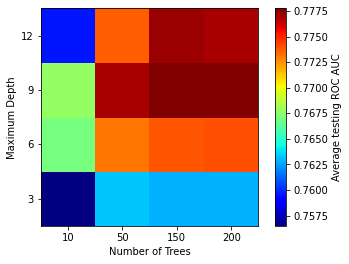

In [72]:
xx_rf , yy_rf = np.meshgrid ( range (5), range(5)   )
cm_rf = plt.cm.jet
ax_rf = plt.axes ()
pcolor_graph = ax_rf.pcolormesh (xx_rf , yy_rf , cv_rf_ex_results_df_2['mean_test_score'].values.reshape ((4,4)), cmap=cm_rf )
plt.colorbar (pcolor_graph, label= 'Average testing ROC AUC')
ax_rf.set_aspect ('equal')
ax_rf.set_xticks ( [0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks ( [0.5, 1.5, 2.5, 3.5])
lst_labels_x = [str(tick_label) for tick_label in rf_params_ex['n_estimators'] ]
lst_labels_y = [str(tick_label) for tick_label in rf_params_ex['max_depth'] ] 
ax_rf.set_xticklabels ( lst_labels_x)
ax_rf.set_yticklabels ( lst_labels_y)
ax_rf.set_xlabel ( 'Number of Trees')
ax_rf.set_ylabel ( 'Maximum Depth')


In [70]:
cv_rf_ex.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [71]:
cv_rf_ex.max_depth = 9
cv_rf_ex.n_estimators = 200
rf.fit ( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [73]:
predict_proba =  rf.predict_proba ( X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
roc_score = roc_auc_score (y_test, predict_proba[:,1])    
print (roc_score)

0.7627206206909415


Plot the ROC Curve

Text(0, 0.5, 'TPR')

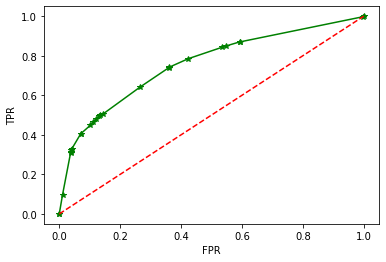

In [74]:
from sklearn.metrics import roc_curve
predict_proba =  dt.predict_proba (X_test ) 
fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])
plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('FPR')
plt.ylabel ('TPR')
